In [1]:
import urllib
from urllib.request import urlopen
import numpy as np
import pandas as pd
import lxml
from lxml import html
from bs4 import BeautifulSoup
from bs4 import *
import xml.etree.cElementTree as ET
import re
import sqlite3
import os
import html5lib
import json
import sys
import requests
import time
import random

In [ ]:
##scraping from billboard.com into sqlite

In [5]:
db = sqlite3.connect("billboard.db")
c = db.cursor()

In [8]:
def getmaxid():
    query = 'select max(id) from billboard'
    c.execute(query)
    return c.fetchall()[0][0]

In [11]:
def getsongs(link):
    soup = BeautifulSoup(urlopen(link), 'lxml')
    length = len(soup.findAll('tr'))


    for e in range(length)[1:]:
        
        try:
            maxid = getmaxid() + 1
        except:
            maxid = 1
        date = soup.findAll('tr')[e].find('td').find('span')['content'][:10]
        year = date[:4]
        week = date[5:10]
        try:
            song = soup.findAll('tr')[e].find('td', {'class': 'views-field-field-chart-item-song'}).text
            artist = soup.findAll('tr')[e].find('td', {'class': 'views-field-field-chart-item-artist'}).text
        except:
            pass

        query = "insert into billboard (id, date) values (?, ?)"
        c.execute(query, [maxid, date])

        query = "UPDATE billboard SET year = (?) WHERE id = (?)"
        c.execute(query, [year, maxid])

        query = "UPDATE billboard SET week = (?) WHERE id = (?)"
        c.execute(query, [week, maxid])

        query = "UPDATE billboard SET song = (?) WHERE id = (?)"
        c.execute(query, [song, maxid])

        query = "UPDATE billboard SET artist = (?) WHERE id = (?)"
        c.execute(query, [artist, maxid])

        db.commit()

In [14]:
for e in list(range(1958, 2018)):
    link = 'http://www.billboard.com/archive/charts/%s/hot-100' % e
    getsongs(link)

HTTPError: HTTP Error 404: Not Found

In [ ]:
##getting audio features from spotify API

In [6]:
import spotipy
import spotipy.util as util

In [7]:
os.getenv('SPOTIPY_CLIENT_ID')
os.getenv('SPOTIPY_CLIENT_SECRET')
os.getenv('SPOTIPY_REDIRECT_URI')


'http://localhost:8877'

In [8]:
scope = 'user-library-read'

'''
if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print ("Usage: %s username" % (sys.argv[0],))
    sys.exit()

token = util.prompt_for_user_token(username, scope)
'''

'\nif len(sys.argv) > 1:\n    username = sys.argv[1]\nelse:\n    print ("Usage: %s username" % (sys.argv[0],))\n    sys.exit()\n\ntoken = util.prompt_for_user_token(username, scope)\n'

In [9]:
util.prompt_for_user_token('arvcondor', scope, '5c73c2e5bcdc4e0fb2e465c75c2581b1', '0b59ef7294014b91ad7b81c205e11fb2', 'localhost:8888/callback')



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=5c73c2e5bcdc4e0fb2e465c75c2581b1&response_type=code&redirect_uri=localhost%3A8888%2Fcallback&scope=user-library-read in your browser




KeyboardInterrupt: 

In [12]:
import spotipy
import spotipy.util as util


clientid = '5c73c2e5bcdc4e0fb2e465c75c2581b1'
clientsecret = '064cdf3eb88249ce8afeb4e70b7cc79c'
username = 'arvcondor'
scopes = 'user-library-modify playlist-modify-private'
CACHE = '.spotipyoauthcache'
redirect = 'localhost:8888/callback'


def getToken(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET, username, scope, redirect):

    token = util.prompt_for_user_token(username,
                                    scope,
                                    client_id=SPOTIPY_CLIENT_ID,
                                    client_secret=SPOTIPY_CLIENT_SECRET,
                                    redirect_uri=redirect)

    if token:
        print('Token successfully obtained!')
        return token
    else:
        print('Failed to get token!')
        return 0


In [13]:
getToken(clientid, clientsecret, username, scopes, redirect)



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=5c73c2e5bcdc4e0fb2e465c75c2581b1&response_type=code&redirect_uri=localhost%3A8888%2Fcallback&scope=playlist-modify-private+user-library-modify in your browser


Enter the URL you were redirected to: https://accounts.spotify.com/authorize?client_id=5c73c2e5bcdc4e0fb2e465c75c2581b1&response_type=code&redirect_uri=localhost%3A8888%2Fcallback&scope=playlist-modify-private+user-library-modify




SpotifyOauthError: Bad Request

In [14]:
from spotipy import oauth2

In [15]:
sp_oauth = oauth2.SpotifyOAuth(clientid, clientsecret,redirect,scope=scopes,cache_path=CACHE )

In [19]:
import sys
import spotipy
import spotipy.util as util

import os
from json.decoder import JSONDecodeError

scope = 'user-library-read'
redirect_uri = "http://localhost:8877"
 
client_id = "5c73c2e5bcdc4e0fb2e465c75c2581b1"
client_secret = "064cdf3eb88249ce8afeb4e70b7cc79c"
username = "arvcondor"

try:
    token = util.prompt_for_user_token(username, scope, client_id, client_secret, redirect_uri)
except (AttributeError, JSONDecodeError):
    os.remove(f".cache-{username}")
    token = util.prompt_for_user_token(username, scope, client_id, client_secret, redirect_uri)

token = util.prompt_for_user_token(username, scope, client_id, client_secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks(limit=1)
    for item in results['items']:
        if item['track']:
            track = item['track']
            print (u"{0} -> {1}".format(track['name'], track['artists'][0]['name']))
        else:
            print ("Access Granted!")
else:
    print ("Can't get token for", username)


Symphony No. 14, "Symphony in Microtones": I. Lamentation: Homage to Supply Belcher (1750-1836) -> Gloria Coates


In [18]:
#token = util.prompt_for_user_token(username, scope)

from os import getenv

CLIENT_ID = getenv('SPOTIPY_CLIENT_ID')
CLIENT_SECRET = getenv('SPOTIPY_CLIENT_SECRET')
REDIRECT_URL = getenv('SPOTIPY_REDIRECT_URI')



def show_tracks(tracks):
    for i, item in enumerate(tracks['items']):
        track = item['track']
        print ("   %d %32.32s %s" % (i, track['artists'][0]['name'],
            track['name']))


if __name__ == '__main__':
    if len(sys.argv) > 1:
        username = sys.argv[1]
    else:
        print ("Whoops, need your username!")
        print ("usage: python user_playlists.py [username]")
        sys.exit()

    #token = util.prompt_for_user_token(username)

    if token:
        sp = spotipy.Spotify(auth=token)
        playlists = sp.user_playlists(username)
        for playlist in playlists['items']:
            if playlist['owner']['id'] == username:
                print (playlist['name'])
                print ('  total tracks', playlist['tracks']['total'])
                results = sp.user_playlist(username, playlist['id'],
                    fields="tracks,next")
                tracks = results['tracks']
                show_tracks(tracks)
                while tracks['next']:
                    tracks = sp.next(tracks)
                    show_tracks(tracks)
    else:
        print ("Can't get token for", username)

In [27]:
import os
from json.decoder import JSONDecodeError

try:
    token = util.prompt_for_user_token(username, scope, client_id, client_secret, redirect_uri)
except (AttributeError, JSONDecodeError):
    os.remove(f".cache-{username}")
    token = util.prompt_for_user_token(username, scope, client_id, client_secret, redirect_uri)

In [238]:
import sqlite3
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import sys

from collections import defaultdict

songslst = defaultdict(list)

client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

everything = {}
dct = {}
lst = []
def get_features(track_ids):
    """Getting the audio feautures"""
    audio_features = sp.audio_features(track_ids)
    return audio_features

def get_id(artist, track):
    """Getting the id of a song based on artist and track name"""
    search_query = "artist:{0} track:{1}".format(artist, track)
    results = sp.search(search_query, type='track', limit=1)
    ids = [i['id'] for i in results['tracks']['items']]
    return ids

'''
def extract_db(db_file):
    connection = sqlite3.connect(db_file)
    c = connection.cursor()
    c.execute("SELECT * from billboard")
    rows = c.fetchall()
    data = { "".join(i[4].strip()): "".join(i[5].strip()) for i in rows}
    print (data)
    return data

'''

def main():
    ctr = 0
    """Get the final dataframe"""
    DB_FILE = "billboard.db" #FULL PATH TO DB FILE HERE
    connection = sqlite3.connect(DB_FILE)
    c = connection.cursor()
    c.execute("select count(*) from billboard")
    id_length = c.fetchall()[0][0]
    for e in range(id_length):
        try:
            c.execute("select * from billboard where id = %s" %e)
            song_info = c.fetchall()[0]
            dct = {}
            dct['db_id'] = song_info[0]
            dct['date'] = song_info[1]
            dct['year'] = song_info[2]
            dct['week'] = song_info[3]
            dct['artist'] = song_info[4].strip()
            dct['track'] = song_info[5].strip()
            artist = song_info[4].strip()
            if re.findall(r'Featuring', artist):
                artist = re.findall(r'(.*[^ ]?).*Featuring', artist)[0]
            track = song_info[5].strip()
            song_id = get_id(artist, track)
            if song_id and get_features(song_id)[0] is not None:
                audio_f = get_features(song_id)[0]
                for feature, value in audio_f.items():
                        dct[feature] = value
            global everything
            everything[song_info[0]] = dct
            sys.stdout.write('\r{}'.format(str(ctr)))
            ctr += 1
        except:
            print (ctr)
            #ctr += 1
        #except Exception:
            #print (ctr)
                         
if __name__=='__main__':
    main()

print (len(everything))

0
57retrying ...1secs
98retrying ...1secs
186retrying ...1secs
241retrying ...1secs
904905
905
905
906907
1806retrying ...1secs
1997retrying ...1secs
2727retrying ...1secs
3019retrying ...1secs
30423043


In [39]:
songs = pd.DataFrame(index = everything.keys(), columns = everything[3000].keys())

In [338]:
songs_all = pd.DataFrame(index = everything.keys(), columns = everything[1].keys())

In [339]:
for key, value in everything.items():
    for kee, valyoo in value.items():
        songs_all.loc[key, kee] = valyoo

In [22]:
#songs_all.to_csv('spotify_all.csv')

In [241]:
#songs_all = pd.read_csv('spotify_all.csv')

In [341]:
'''###FIXING NULL VALUES by finding artist/track names that spotify doesn't recognize
#songs_all['artist'] = songs_all['artist'].apply(lambda x: re.sub(r'(.*) [w, W].*', r'\1', x))

songs_all['artist'] = songs_all['artist'].apply(lambda x: re.sub(r'(.*?),.*', r'\1', x)) #removing comma'd artists

songs_all['artist'] = songs_all['artist'].apply(lambda x: re.sub(r'(.*) [Featuring, featuring].*', r'\1', x)) #removing featured artists

songs_all['artist'] = songs_all['artist'].apply(lambda x: re.sub(r'(.*) And.*', r'\1', x)) #removing 'And'

songs_all['artist'] = songs_all['artist'].apply(lambda x: re.sub(r'(.*) &.*', r'\1', x)) #removing ampersand

songs_all['artist'] = songs_all['artist'].apply(lambda x: re.sub(r'(.*) [With, with].*', r'\1', x)) #removing With

songs_all['artist'] = songs_all['artist'].apply(lambda x: re.sub(r'Far\*East Movement', 'Far East Movement', x)) #fixing far east

songs_all['artist'] = songs_all['artist'].apply(lambda x: re.sub(r"Soulja Boy Tell'em", 'Soulja Boy', x)) #fixing soulja boy

songs_all['artist'] = songs_all['artist'].apply(lambda x: re.sub(r"SSgt", 'Sgt', x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r'(.*) {0,}\(.*', r'\1', x)) #fixing parenthetical titles

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"I m", "I'm", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"That s", "That's", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"(.*)/.*", r'\1', x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"Don t", "Don't", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"I ll", "I'll", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"Who s", "Who's", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"Can t", "Can't", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"Didn t", "Didn't", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"Haven t", "Haven't", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"There ll", "There'll", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"Doesn t", "Doesn't", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"Ain t", "Ain't", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"Elmo s", "Elmo's", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"To-night\?", "Tonight", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"To-night\?", "Tonight", x))

songs_all['track'] = songs_all['track'].apply(lambda x: re.sub(r"Independent Women Part 1", "Independent Women Pt. 1", x))


'''


In [381]:
#songs_all[songs_all['acousticness'].isnull()].groupby(['artist', 'track']).count()

In [376]:
songs = pd.read_csv('songs_scaled.csv')
del songs['Unnamed: 0.1']
del songs['Unnamed: 0.1.1']
del songs['Unnamed: 0']

In [400]:
songs_all_new = pd.DataFrame(index = songs.index, columns = songs.columns[:17]) #new df with first 17 columns
#check to make sure there aren't other 'unnamed' columns

In [401]:
#grabbing ids from the scaled dataframe and putting unscaled features in a new dataframe. for some reason, getting
#the IDs and then the features from the spotify API has been weirdly unreliable; this works much better
def get_features_all_over_again(songs):
    global songs_all_new
    for index, row in songs.iterrows():
        features = get_features(songs.loc[index, 'id'])
        features = features[0] #because the first value is a dict nested in a list
        songs_all_new.loc[index, 'artist'] = songs.loc[index, 'artist']
        songs_all_new.loc[index, 'track'] = songs.loc[index, 'track']
        songs_all_new.loc[index, 'id'] = songs.loc[index, 'id']
        songs_all_new.loc[index, 'date'] = songs.loc[index, 'date']
        songs_all_new.loc[index, 'year'] = songs.loc[index, 'year']
        songs_all_new.loc[index, 'acousticness'] = features['acousticness']
        songs_all_new.loc[index, 'energy'] = features['energy']
        songs_all_new.loc[index, 'danceability'] = features['danceability']
        songs_all_new.loc[index, 'duration_ms'] = features['duration_ms']
        songs_all_new.loc[index, 'instrumentalness'] = features['instrumentalness']
        songs_all_new.loc[index, 'key'] = features['key']
        songs_all_new.loc[index, 'liveness'] = features['liveness']
        songs_all_new.loc[index, 'loudness'] = features['loudness']
        songs_all_new.loc[index, 'mode'] = features['mode']
        songs_all_new.loc[index, 'speechiness'] = features['speechiness']
        songs_all_new.loc[index, 'time_signature'] = features['time_signature']
        songs_all_new.loc[index, 'tempo'] = features['tempo']
        songs_all_new.loc[index, 'valence'] = features['valence']
    

In [402]:
get_features_all_over_again(songs)

In [521]:
songs[songs['year'] == 2003][['track', 'artist']]

,track,artist
875,Lose Yourself,Eminem
876,"Bump, Bump, Bump",B2K & P. Diddy
877,All I Have,Jennifer Lopez Featuring LL Cool J
878,In Da Club,50 Cent
879,Get Busy,Sean Paul
880,21 Questions,50 Cent Featuring Nate Dogg
881,This Is The Night,Clay Aiken
882,Crazy In Love,Beyonce Featuring Jay-Z
883,Shake Ya Tailfeather,"Nelly, P. Diddy & Murphy Lee"
884,Baby Boy,Beyonce Featuring Sean Paul


In [431]:
#creating cuts for every five years
songs_all_new['cut'] = pd.cut(songs_all_new['year'], 12, labels = [1956, 1961, 1966, 1971, 1976, 1981, 1986, 1991, 1996, 2001, 2006, 2011])

In [443]:
songs_all_new.to_csv('songs_unscaled.csv')

In [343]:
#getting null values. sometimes this works, sometimes it doesn't. i don't know why
for index, row in songs_all[songs_all['acousticness'].isnull()].iterrows():
    try:
        songid = get_id(songs_all.loc[index, 'artist'].split(' ')[0], songs_all.loc[index, 'track'])
        features = get_features(songid)[0]
        for key, value in features.items():
            songs_all.loc[index, key] = value
    except:
        print (index, songid)

106 []
200 []
201 []
202 []
203 []
204 []
279 []
280 []
281 []
282 []
642 []
643 []
644 []
864 []
871 []
872 []
886 []
950 []
1233 []
1234 []
1235 []
1236 []
1237 []
1238 []
1239 []
1240 []
1271 []
1385 []
1386 []
1387 []
1493 []
1553 []
retrying ...1secs
1625 []
1626 []
1645 []
1646 []
1647 []
1655 []
1656 []
1657 []
1658 []
1707 []
1840 []
2191 []
2192 []
2207 []
2208 []
2209 []
2210 []
2211 []
2212 []
2213 []
2214 []
2215 []
2216 []
2217 []
2545 []
2546 []
2548 []
2678 []
2679 []
2680 []
2681 []
2682 []


In [54]:
#songs_all = songs_all[~songs_all['acousticness'].isnull()]

In [68]:
songs = songs_all.groupby(['id'], sort=False).max().reset_index()

In [ ]:
####################################################THE ANALYSIS####################################

In [52]:
streak = 1
for index, row in songs_all.iterrows():
    try:
        if songs_all.loc[index, 'id'] == songs_all.loc[index - 1, 'id']:
            streak += 1
            songs_all.loc[index, 'streak'] = streak
        else:
            streak = 1
            songs_all.loc[index, 'streak'] = streak
    except:
        pass

In [51]:
songs_all['streak'] = pd.Series()
songs_all['streak'] = songs_all['streak'].fillna(0)

In [89]:
#MINMAX SCALING THE FEATURES
from sklearn.preprocessing import MinMaxScaler

In [90]:
scaler = MinMaxScaler()

In [265]:
data = songs[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
             'liveness', 'valence', 'tempo', 'duration_ms']]

In [95]:
fitdata = scaler.fit_transform()

In [267]:
songs_scaled = pd.DataFrame(fitdata, columns = data.columns)
songs_scaled['key'] = songs['key']
songs_scaled['artist'] = songs['artist']
songs_scaled['id'] = songs['id']
songs_scaled['track'] = songs['track']
songs_scaled['date'] = songs['date']
songs_scaled['year'] = songs['year']
songs_scaled['streak'] = songs['streak']

In [ ]:
###STANDARD SCALING THE FEATURES

In [425]:
from sklearn.preprocessing import StandardScaler

In [426]:
stdscaler = StandardScaler()

In [427]:
data = songs_all_new[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
             'liveness', 'valence', 'tempo', 'duration_ms']]

In [428]:
fitdata = stdscaler.fit_transform(data)

In [429]:
songs_scaled_std = pd.DataFrame(fitdata, columns = data.columns)
songs_scaled_std['key'] = songs_all_new['key']
songs_scaled_std['artist'] = songs_all_new['artist']
songs_scaled_std['id'] = songs_all_new['id']
songs_scaled_std['track'] = songs_all_new['track']
songs_scaled_std['date'] = songs_all_new['date']
songs_scaled_std['year'] = songs_all_new['year']
songs_scaled_std['streak'] = songs_all_new['streak']

In [444]:
songs_scaled_std.to_csv('songs_scaled_std.csv')

In [138]:
#measuring differences across ALL YEARS, not simply per year. This produces the grpah about the eighties
stds = []
eighties = []
year = 0
def get_std(x):
    global year
    lst = []
    for column, item in x.iteritems():
        if column == 'id':
            pass
        elif column == 'db_id':
            pass
        elif column == 'type':
            pass
        elif column == 'date':
            pass
        elif column == 'year':
            pass
        elif column == 'week':
            pass
        elif column == 'uri':
            pass
        elif column == 'streak':
            pass
        elif type(item) == str:
            pass
        else:
            global year
            ###UNCOMMENT ALL THIS IF YOU WANT TO MEASURE SOMETHING BESIDES THE 1980S
            '''
            if year == 1958:
                lst.append(np.sqrt(np.square(x[column] - songs[(songs['year'] <= year + 2) & (songs['year'] >= year)][column].mean()) /
                                   songs[(songs['year'] <= year + 2) & (songs['year'] >= year)][column].std()))
            elif year == 2016:
                lst.append(np.sqrt(np.square(x[column] - songs[(songs['year'] >= year - 2) & (songs['year'] <= year)][column].mean()) / 
                                   songs[(songs['year'] >= year - 2) & (songs['year'] <= year)][column].std()))
            else:
                lst.append(np.sqrt(np.square(x[column] - songs[(songs['year'] >= year - 2) & (songs['year'] <= year + 2)][column].mean()) / 
                                   songs[(songs['year'] >= year - 2) & (songs['year'] <= year + 2)][column].std()))
            '''
            lst.append(np.sqrt(np.square(x[column] - songs[column].mean()) / 
                                   songs[column].std()))
    global stds
    #stds.append(pd.Series(lst).mean())
    eighties.append(pd.Series(lst).mean())
        
def iterate(songs):
    for e in range(len(songs)):
        df = songs.loc[e]
        global year
        year = df['year']
        get_std(df)

In [139]:
iterate(songs)

In [140]:
#songs['std_exact_year'] = stds
songs['eighties'] = eighties

In [269]:
stds = []
iterate(songs_scaled)
songs_scaled['std'] = stds

In [324]:
years = songs_scaled.groupby('year').mean()
years['top_song'] = pd.Series()
years['max_streak'] = pd.Series()

In [346]:
songslst = []
streaklist = []

for year in years.index:
    getyear = songs[songs['year'] == year]
    
    song = (getyear[getyear['streak'] == getyear['streak'].max()]['artist'].to_string(index=False) + ',' + ' ' + 
            str(getyear[getyear['streak'] == getyear['streak'].max()]['track'].to_string(index=False)))
    songslst.append(song)
    9
    streak = list(getyear[getyear['streak'] == getyear['streak'].max()]['streak'])[0]
    streaklist.append(streak)
    
years['top_song'] = songslst
years['max_streak'] = streaklist

In [141]:
songs.to_csv('spotify_with_broad_years.csv')

In [2]:
songs = pd.read_csv('songs_scaled.csv')

In [ ]:
#####SAMPLING BY YEAR#########

In [526]:
samples = pd.DataFrame(columns = songs.columns)

In [464]:
#creating cuts for every
songs['cut'] = pd.cut(songs['year'], 12, labels = [1956, 1961, 1966, 1971, 1976, 1981, 1986, 1991, 1996, 2001, 2006, 2011])

In [167]:
songs['cut'].unique()

[1963, 1956, 1968, 1973, 1979, ..., 1989, 1994, 2000, 2005, 2010]
Length: 11
Categories (11, int64): [1956 < 1963 < 1968 < 1973 ... 1994 < 2000 < 2005 < 2010]

In [551]:
##randomly sample from songs's bins

def get_samples(songs):
    for cut in songs.groupby('cut').count().reset_index()['cut']:
        year_df = songs[songs['cut'] == cut]
        sample = year_df.sample(48, random_state = 42)
        global samples
        samples = samples.append(sample)

In [552]:
get_samples(songs)

In [553]:
samples = samples.reset_index()

In [554]:
samples.columns

Index(['index', 'acousticness', 'artist', 'cut', 'danceability', 'date',
       'duration_ms', 'eighties', 'energy', 'id', 'instrumentalness', 'iqr',
       'iqr_year', 'key', 'liveness', 'loudness', 'lyrics', 'mad',
       'speechiness', 'std', 'std_exact_year', 'streak', 'tempo', 'track',
       'valence', 'x', 'y', 'year'],
      dtype='object')

In [555]:
samples = samples[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
         'tempo', 'duration_ms', 'date', 'year', 'cut']]

In [556]:
stds = []
cut = 0
def get_std_cut(x):
    global cut
    lst = []
    for column, item in x.iteritems():
        if column == 'id':
            pass
        elif column == 'db_id':
            pass
        elif column == 'type':
            pass
        elif column == 'date':
            pass
        elif column == 'year':
            pass
        elif column == 'week':
            pass
        elif column == 'uri':
            pass
        elif column == 'streak':
            pass
        elif column == 'cut':
            pass
        elif type(item) == str:
            pass
        #elif column == 'acousticness' or column == 'liveness' or column == 'instrumentalness' or column == 'duration_ms':
         #   lst.append(abs(x[column] - samples[samples['cut'] == cut][column].median()))
        else:
            if year == 1958:
                lst.append(np.sqrt(np.square(x[column] - songs[(songs['year'] <= year + 2) & (songs['year'] >= year)][column].mean()) /
                                   songs[(songs['year'] <= year + 2) & (songs['year'] >= year)][column].std()))
            elif year == 2016:
                lst.append(np.sqrt(np.square(x[column] - songs[(songs['year'] >= year - 2) & (songs['year'] <= year)][column].mean()) / 
                                   songs[(songs['year'] >= year - 2) & (songs['year'] <= year)][column].std()))
            else:
                lst.append(np.sqrt(np.square(x[column] - songs[(songs['year'] >= year - 2) & (songs['year'] <= year + 2)][column].mean()) / 
                                   songs[(songs['year'] >= year - 2) & (songs['year'] <= year + 2)][column].std()))
            #lst.append(np.sqrt(np.square(x[column] - samples[samples['cut'] == cut][column].mean()) / 
                                   #samples[samples['cut'] == cut][column].std()))
            #lst.append(abs(x[column] - samples[samples['cut'] == cut][column].mean()))
    global stds
    #print (lst)
    stds.append(pd.Series(lst).mean())
    #eighties.append(pd.Series(lst).mean())
        
def iterate_cut(samples):
    for e in range(len(samples)):
        df = samples.loc[e]
        global cut
        cut = df['cut']
        get_std_cut(df)

In [557]:
iterate_cut(samples)

In [559]:
samples['mad'] = stds

In [560]:
samples.to_csv('samples_new_cuts.csv')

In [561]:
#kind of confusing, but this is what these are:
#features: sound features of sampled data, minmax scaled
#features_all: sound features of all songs, minmax scaled
#features_all_std: sound features of all songs, standard scaled
#features_std: sound features of sampled data, standard scaled

features = samples[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo', 'duration_ms', 'cut']]

features_all = songs[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo', 'duration_ms', 'cut']]

features_all_std = songs_all_new[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo', 'duration_ms','cut']]


In [562]:


###FINDING DISTANCES IN VECTOR SPACE
##searching by cut

'''this features_all has only the cut without the year, for use in the function below'''


from collections import defaultdict

distances_median = [] #list for the median euclidean distances
distances_mean = [] #list for the median euclidean distances
most_different = pd.DataFrame(index = range(28611), columns = [['cut', 'song1', 'song2', 'distance']])
cut = 0
song_index = 0

index_pos = 0
def get_distances(df):
    global cut
    global distances
    global features_all
    song = np.array(df.drop(['cut']))
        
    distance_list = []
        
    cut_songs_df = features_all[features_all['cut'] == cut]
    
    del cut_songs_df['cut']
    
        
    for index, row in cut_songs_df.iterrows():
        distance = np.linalg.norm(song - np.array(cut_songs_df.loc[index]))
        distance_list.append(distance)
        
        global song_index
        global most_different
        global index_pos
        
        ''' uncomment to create the dataframe of most and least different songs per cut
        most_different.loc[index_pos, 'cut'] = cut
        most_different.loc[index_pos, 'song1'] = song_index, index
        most_different.loc[index_pos, 'song2'] = index
        most_different.loc[index_pos, 'distance'] = distance
        '''
        
        index_pos += 1
        
    distances_median.append(pd.Series(distance_list).median())#getting the median euclidean distances
    distances_mean.append(pd.Series(distance_list).mean())#getting the mean euclidean distances
    
    sys.stdout.write('\r {} position, {} percent'.format(song_index, song_index/ len(features_all)))


def iterate_cut(features):
    for e in range(len(features)):
        df = features.loc[e]
        global song_index
        song_index = e
        global cut
        cut = df['cut']
        get_distances(df)

In [563]:
iterate_cut(features_all) #choose 'features' for samples and 'features_all' for all songs

 1042 position, 0.9990412272291467 percent

In [564]:
'''the below df should probably remain temporary and the lists should be attached to the songs df'''

distance_df = pd.DataFrame(index = songs.index)
distance_df['median'] = distances_median
distance_df['mean'] = distances_mean
distance_df['cut'] = songs['cut']
#distance_df.groupby('cut').mean().to_csv('DISTANCES OF ALL SONGS cut.csv')

In [497]:
###FINDING DISTANCES IN VECTOR SPACE
##searching by year

'''this features_all has only the year without the cut, for use in the function below'''

features_all = songs[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo', 'duration_ms', 'year']]

from collections import defaultdict

distances_median = [] #list for the median euclidean distances
distances_mean = [] #list for the median euclidean distances
most_different = pd.DataFrame(index = range(28611), columns = [['year', 'song1', 'song2', 'distance']])
year = 0
song_index = 0

index_pos = 0
def get_distances(df):
    global year
    global distances
    global features_all
    song = np.array(df.drop(['year']))
        
    distance_list = []
        
    cut_songs_df = features_all[features_all['year'] == year]
    
    del cut_songs_df['year']
    
        
    for index, row in cut_songs_df.iterrows():
        distance = np.linalg.norm(song - np.array(cut_songs_df.loc[index]))
        distance_list.append(distance)
        
        global song_index
        global most_different
        global index_pos
        
        ''' uncomment to create the dataframe of most and least different songs per cut
        most_different.loc[index_pos, 'cut'] = cut
        most_different.loc[index_pos, 'song1'] = song_index, index
        most_different.loc[index_pos, 'song2'] = index
        most_different.loc[index_pos, 'distance'] = distance
        '''
        
        index_pos += 1
        
    distances_median.append(pd.Series(distance_list).median())#getting the median euclidean distances
    distances_mean.append(pd.Series(distance_list).mean())#getting the mean euclidean distances
    
    sys.stdout.write('\r {} position, {} percent'.format(song_index, song_index/ len(features_all)))


def iterate_cut(features):
    for e in range(len(features)):
        df = features.loc[e]
        global song_index
        song_index = e
        global year
        year = df['year']
        get_distances(df)

In [498]:
iterate_cut(features_all) #choose 'features' for samples and 'features_all' for all songs

 1042 position, 0.9990412272291467 percent

In [499]:
'''the below df should probably remain temporary and the lists should be attached to the songs df'''

distance_df = pd.DataFrame(index = songs.index)
distance_df['median'] = distances_median
distance_df['mean'] = distances_mean
distance_df['year'] = songs['year']
distance_df.groupby('year').mean().to_csv('DISTANCES OF ALL SONGS year.csv')

In [ ]:
####START HERE TO GET FEATURES

In [155]:
songs = pd.read_csv('songs_scaled.csv')

In [579]:
'''note that this features_all includes the year and the cut, while the previous includes only the cut'''

features_all = songs[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'cut', 'tempo', 'year']] #removing tempo and duration

In [580]:
##FINDING THE MOST DIFFERNET SONGS

from collections import defaultdict

#VV creating a dataframe that has the difference between every song in a cut
most_different = pd.DataFrame(index = range(28611), columns = [['cut', 'song1', 'song1 title', 'song2',
                                                                'song2 title', 'distance']])
cut = 0
song_index = 0

index_pos = 0
def get_distances_all(df):
    global cut
    global distances
    global features_all
    del df['cut'] #deleting cut and year columns to now throw off the distances
    del df['year']

    song = np.array(df)
        
    cut_songs_df = features_all[features_all['cut'] == cut] #creating a df with only the same cut as the song ('df')
    
    del cut_songs_df['cut'] #deleting cut and year columns in the group df
    del cut_songs_df['year']
    
        
    for index, row in cut_songs_df.iterrows():
        distance = np.linalg.norm(song - np.array(cut_songs_df.loc[index]))
        
        global song_index
        global most_different
        global index_pos
        
        most_different.loc[index_pos, 'cut'] = cut
        most_different.loc[index_pos, 'song1'] = song_index
        most_different.loc[index_pos, 'song1 title'] = songs.loc[song_index, 'track']
        most_different.loc[index_pos, 'song2'] =index
        most_different.loc[index_pos, 'song2 title'] = songs.loc[index, 'track']
        most_different.loc[index_pos, 'distance'] = distance
        
        index_pos += 1
        


def iterate_cut_all(features_all):
    for e in (features_all.index):
        df = features_all.loc[e]
        global song_index
        song_index = e
        
        global cut
        cut = df['cut']
        get_distances_all(df)
        sys.stdout.write('\r index: {}, percent: {}'.format(e, e/len(features_all)))

In [581]:
iterate_cut_all(features_all)

 index: 1042, percent: 0.9990412272291467

In [582]:
most_different = most_different[most_different['distance'] != 0]

In [583]:
biggest_differences = pd.DataFrame(index = most_different.cut.unique(), columns = most_different.columns)
for year in songs.cut.unique():
    df = most_different[most_different['cut'] == year]
    max_diff = df['distance'].max()
    df = df[df['distance'] == max_diff].iloc[1]
    biggest_differences.loc[year, 'song1'] = df['song1']
    biggest_differences.loc[year, 'song2'] = df['song2']
    biggest_differences.loc[year, 'song1 title'] = df['song1 title']
    biggest_differences.loc[year, 'song2 title'] = df['song2 title']
    biggest_differences.loc[year, 'cut'] = df['cut']
    biggest_differences.loc[year, 'distance'] = df['distance']

In [584]:
smallest_differences = pd.DataFrame(index = most_different.cut.unique(), columns = most_different.columns)
for year in songs.cut.unique():
    df = most_different[most_different['cut'] == year]
    min_diff = df['distance'].min()
    df = df[df['distance'] == min_diff].iloc[1]
    smallest_differences.loc[year, 'song1'] = df['song1']
    smallest_differences.loc[year, 'song2'] = df['song2']
    smallest_differences.loc[year, 'song1 title'] = df['song1 title']
    smallest_differences.loc[year, 'song2 title'] = df['song2 title']
    smallest_differences.loc[year, 'cut'] = df['cut']
    smallest_differences.loc[year, 'distance'] = df['distance']

In [585]:
all_differences = smallest_differences.join(biggest_differences, lsuffix = ('_smallest'), rsuffix= '_biggest')

In [589]:
all_differences[['song1 title_smallest', 'song2 title_smallest','distance_smallest']]

,song1 title_smallest,song2 title_smallest,distance_smallest
1961,Groovin',My Girl,0.0960559
1956,Blue Moon,Stuck On You,0.133146
1966,How Can You Mend A Broken Heart,Love Is Blue (L'amour Est Bleu),0.119546
1971,One Of These Nights,You're So Vain,0.0986636
1976,Night Fever,Stayin' Alive,0.111877
1986,The Promise Of A New Day,Opposites Attract,0.0952066
1981,The Power Of Love,Down Under,0.132573
1991,Fantasy,Dreamlover,0.131742
1996,One Week,Mmmbop,0.10368
2001,Inside Your Heaven,A Moment Like This,0.0995928


In [512]:
all_differences['song1_smallest_artist'] = all_differences['song1_smallest'].apply(lambda x: songs.loc[x, 'artist'])
all_differences['song2_smallest_artist'] = all_differences['song2_smallest'].apply(lambda x: songs.loc[x, 'artist'])
all_differences['song1_biggest_artist'] = all_differences['song1_biggest'].apply(lambda x: songs.loc[x, 'artist'])
all_differences['song2_biggest_artist'] = all_differences['song2_biggest'].apply(lambda x: songs.loc[x, 'artist'])

In [513]:
all_differences['tableau1_biggest'] = all_differences['distance_biggest']/2
all_differences['tableau2_biggest'] = -all_differences['distance_biggest']/2
all_differences['tableau1_smallest'] = all_differences['distance_smallest']/2
all_differences['tableau2_smallest'] = -all_differences['distance_smallest']/2

In [180]:
all_differences.to_csv('all_differences_no_year.csv')

In [514]:
all_differences.to_csv('all_differences.csv')

In [586]:
###PRINCIPAL COMPONENTS

from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=2)

In [587]:
two_features= pca.fit_transform(features_all.drop(['cut'], 1, inplace=False))

two_features = scaler.fit_transform(two_features)

two_features = pd.DataFrame(two_features)

In [588]:
songs['x'] = two_features[0]
songs['y'] = two_features[1]

In [4]:
######GET IQR

In [83]:
iqr = []

def get_iqr(features_all):
    global iqr
    for cut in features_all['cut'].unique():
        numbers = []
        df = features_all[features_all['cut'] == cut]
        del df['year']
        del df['cut']
        for column in df.columns:
            rng = df[column].quantile(.75) - df[column].quantile(.25)
            numbers.append(rng)
        global samples
        for i in range(len(samples[samples['cut'] == cut])):
            iqr.append(sum(numbers) / len(numbers))
        

In [84]:
get_iqr(features_all)

In [74]:
songs['iqr_year'] = iqr

In [76]:
samples = pd.read_csv('samples.csv')

In [85]:
samples['iqr'] = iqr

In [86]:
samples.to_csv('samples.csv')

In [20]:
##########################EXPLORING CLUSTERS##################################

In [230]:
from sklearn.cluster import KMeans

In [232]:
features_all = songs[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo', 'duration_ms', 'year', 'cut']]

kmeans = KMeans(n_clusters=4, random_state=0).fit(features_all.drop(['year','cut'], axis=1))

In [233]:
songs['labels'] = kmeans.labels_

In [235]:
percentages = songs.groupby(['year', 'labels']).agg({'energy': 'sum'})
percentages = percentages.groupby(level=0).apply(lambda x: 
                                                 100 * x / float(x.sum()))

In [236]:
percentages.to_csv('percentages.csv')

In [234]:
songs.to_csv('kmeans.csv')

In [119]:
#######EXPLORING TIME SERIES###############3

In [142]:
features_all = features_all[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                            'liveness', 'valence', 'tempo', 'duration_ms', 'cut', 'year']]

In [143]:
for column in features_all.drop(['cut', 'year'], axis = 1).columns:
    features_all['{}_shift'.format(column)] = features_all[column].shift(1)
    
features_all = features_all.fillna(0)   

for column in features_all[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                            'liveness', 'valence', 'tempo', 'duration_ms', 'cut', 'year']].drop(['cut', 'year'], axis = 1).columns:
    features_all['{}_deriv'.format(column)] = features_all[column + '_shift'] - features_all[column]

/home/arvcondor/anaconda3/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [150]:
derivatives = features_all.loc[:,'danceability_deriv':]

In [151]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(features_all.drop(['year','cut'], axis=1))

In [152]:
songs['derivative_labels'] = kmeans.labels_

In [153]:
percentages = songs.groupby(['year', 'derivative_labels']).agg({'energy': 'sum'})
percentages = percentages.groupby(level=0).apply(lambda x: 
                                                 100 * x / float(x.sum()))

In [154]:
percentages.to_csv('derivative_percentages.csv')

In [ ]:
'''#hierarchical clustering'''

In [592]:
from sklearn.cluster import AgglomerativeClustering

In [624]:
ac = AgglomerativeClustering()

In [625]:
ac.fit_predict(features_all.drop(['cut', 'year'], axis=1))

array([0, 0, 1, ..., 0, 0, 0])

In [629]:
hm = pd.DataFrame(ac.labels_, features_all['year'])

In [633]:
from matplotlib import pyplot as plt
%matplotlib inline

hm = hm.groupby('year').mean()

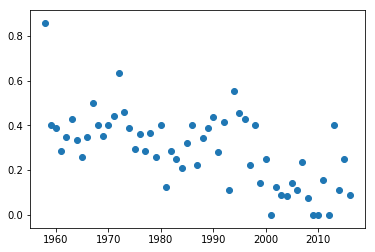

In [635]:
plt.scatter(hm.index, hm[0])